# Shrimp Exploratory Data Analysis

In this document, we perform some exploratory data analysis on the shrimp dataset that was created in the SHRIMP_Version_1 notebook. In addition to studying the relationships between some of the environmental variables and shrimp catch, we also clean the data and create a dataframe from the cleaned data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns


df_unduplicated = pd.read_csv('../../data/SHRIMP_unduplicated.csv')





In the documentation, it states that if no shrimp are caught in a sample, the value should be left blank. Therefore, we import the blank catch data with zero.

In [2]:
# List of columns to fill NaN with zero
columns_to_fill = ['SAMPLE_BM', 'SAMPLE_BF', 'SAMPLE_PM', 'SAMPLE_PF', 'SAMPLE_WM',
       'SAMPLE_WF', 'CNT_BM', 'CNT_BF', 'CNT_PM', 'CNT_PF', 'CNT_WM',
       'CNT_WF']

# Fill NaN with zero in the specified columns
df_unduplicated[columns_to_fill] = df_unduplicated[columns_to_fill].fillna(0)

In [3]:
# Creates total shrimp count and weight columns

df_unduplicated['TOTAL_SHRIMP_COUNT'] = df_unduplicated['CNT_BM']+ df_unduplicated['CNT_BF'] + df_unduplicated['CNT_PM'] + df_unduplicated['CNT_PF']+  df_unduplicated['CNT_WM'] + df_unduplicated['CNT_WF']
df_unduplicated['TOTAL_SHRIMP_WEIGHT'] = df_unduplicated['SAMPLE_BM']+ df_unduplicated['SAMPLE_BF'] + df_unduplicated['SAMPLE_PM'] + df_unduplicated['SAMPLE_PF']+  df_unduplicated['SAMPLE_WM'] + df_unduplicated['SAMPLE_WF']

In [4]:

# Features and response variable.
# A number of these features will not be used for modeling, but will be used for EDA.

features = ['DEPTH_EMAX',
            'TEMPSURF',
            'TEMPMID',
            'SALSURF',
            'SALMID',
            'SALMAX', 
            'OXYSURF', 
            'OXYMID', 
            'OXYMAX', 
            'CHLORSURF', 
            'CHLORMID',
            'CHLORMAX', 
            'FAUN_ZONE', 
            'STAT_ZONE', 
            'TEMP_SSURF', 
            'TEMP_BOT', 
            'TEMP_SAIR', 
            'TIME_MIL', 
            'DECSLAT', 
            'DECSLON', 
            'YEAR', 
            'TOTAL_SHRIMP_COUNT', 
            'TURBSURF',
            'TURBMID', 
            'TURBMAX', 
            'DAYOFYEAR',
            'CRUISEID', 
            'GEAR_SIZE', 
            'GEAR_TYPE', 
            'MESH_SIZE', 
            'MIN_FISH']

X = df_unduplicated[features]
y = df_unduplicated['TOTAL_SHRIMP_WEIGHT']




### Data Cleaning

We now perform some data cleaning. 

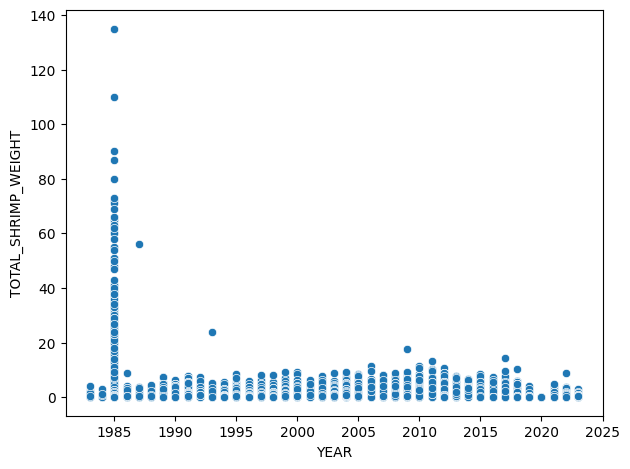

In [5]:
#Plotting year against total catch weight


sns.scatterplot(x=X['YEAR'], y=y,)
 

plt.tight_layout()
plt.show()


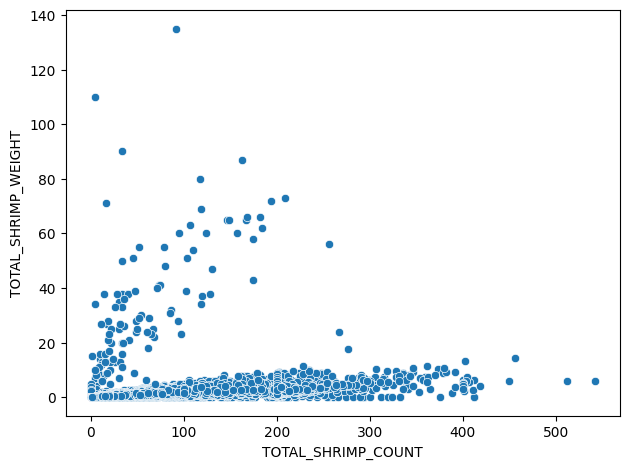

In [6]:
#Plotting total count against total catch weight


sns.scatterplot(x=X['TOTAL_SHRIMP_COUNT'], y=y,)
 

plt.tight_layout()
plt.show()

From this, we can see that there was one cruise that gave incorrect data. I suspect they didn't put a decimal in their records. 

In [7]:
# Find the row with the maximum TOTAL_SHRIMP_WEIGHT
max_shrimp_weight_row = df_unduplicated.loc[df_unduplicated['TOTAL_SHRIMP_WEIGHT'].idxmax()]

# Extract the CRUISEID corresponding to this row
max_cruiseid = max_shrimp_weight_row['CRUISEID']

df_check = df_unduplicated[df_unduplicated['CRUISEID'] == max_cruiseid]

df_check.tail(20)

,STATIONID,DEPTH_EMAX,TEMPSURF,TEMPMID,SALSURF,SALMID,SALMAX,OXYSURF,OXYMID,OXYMAX,...,CNT_PM,CNT_PF,CNT_WM,CNT_WF,GEAR_SIZE,GEAR_TYPE,MESH_SIZE,MIN_FISH,TOTAL_SHRIMP_COUNT,TOTAL_SHRIMP_WEIGHT
1595,20041,25.0,23.47,23.90,29.43,29.87,30.69,7.8,7.4,7.3,...,0.0,1.0,3.0,3.0,40.0,ST,1.63,15.0,50.0,25.0
1596,20043,24.0,23.46,23.93,27.00,29.65,30.98,8.0,7.1,6.7,...,0.0,1.0,0.0,1.0,40.0,ST,1.63,15.0,65.0,23.0
1597,20044,32.0,24.49,24.66,31.24,31.47,32.20,7.2,7.0,5.3,...,0.0,0.0,0.0,0.0,40.0,ST,1.63,15.0,102.0,39.0
1598,20045,24.0,23.94,24.15,30.01,30.33,31.09,6.6,6.5,5.5,...,0.0,0.0,0.0,0.0,40.0,ST,1.63,15.0,174.0,58.0
1599,20046,26.0,23.83,23.75,30.49,30.59,31.63,6.9,6.8,6.2,...,0.0,0.0,0.0,0.0,40.0,ST,1.63,15.0,2.0,1.0
1600,20047,26.0,23.37,24.25,28.00,30.19,31.33,7.8,7.2,7.8,...,0.0,0.0,0.0,0.0,40.0,ST,1.63,15.0,1.0,1.0
1601,20049,18.0,22.94,22.76,25.74,26.13,29.33,5.9,5.9,5.1,...,0.0,0.0,5.0,8.0,40.0,ST,1.63,15.0,24.0,14.0
1602,20050,20.0,23.27,23.43,25.66,27.93,29.64,7.3,6.5,5.6,...,0.0,0.0,16.0,20.0,40.0,ST,1.63,15.0,36.0,26.0
1603,20051,16.0,23.69,23.61,28.25,28.28,28.86,7.7,8.0,6.7,...,0.0,0.0,27.0,36.0,40.0,ST,1.63,15.0,63.0,29.0
1604,20053,26.0,24.57,24.40,31.12,31.44,31.57,7.3,7.2,7.1,...,1.0,0.0,0.0,0.0,40.0,ST,1.63,15.0,17.0,9.0


So unless 50 shrimp weighed 25 kilograms, there is a mistake here. We could try to fix this, but it is probably easier to just throw these out for the time being.

In [8]:
max_cruiseid

61

### Creating a filtered dataframe

We now create a filtered dataframe where we throw away rows that have unrealistic values. Many of these cutoffs are provided by the documentation, and others by some earlier EDA

In [9]:
#Here are a bunch of steps filtering the dataframe
df_filtered = df_unduplicated[df_unduplicated['CRUISEID'] != max_cruiseid] #Getting rid of the problem cruise
df_filtered.drop(df_filtered[df_filtered['TEMPSURF'] < 5].index, inplace=True) # Getting rid of unreasonably cold or hot measurements. 
df_filtered.drop(df_filtered[df_filtered['TEMPMID'] < 5].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['TEMPMID'] > 35].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['OXYMAX'] > 20].index, inplace=True) # Getting rid of unreasonably high oxygen readings. The cutoff of 20 is from the documentation page 13
df_filtered.drop(df_filtered[df_filtered['OXYMID'] > 20].index, inplace=True) 
df_filtered.drop(df_filtered[df_filtered['OXYSURF'] > 20].index, inplace=True) 
df_filtered.drop(df_filtered[df_filtered['CHLORSURF'] < 0].index, inplace=True) # Cholorophyll won't be negative
df_filtered.drop(df_filtered[df_filtered['CHLORMID'] < 0].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['CHLORMAX'] < 0].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['TURBMAX'] > 100].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['TEMP_BOT'] < 5].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['TEMP_BOT'] > 35].index, inplace=True) #I don't think the bottom of the ocean will be 35 C
df_filtered.drop(df_filtered[df_filtered['TEMP_SSURF'] < -1.1].index, inplace=True) #It seems strange that the readings can be less than 0, but the documentation gives this as the lower bound of the range
df_filtered.drop(df_filtered[df_filtered['TEMP_SAIR'] > 50].index, inplace=True) # For some reason, occasionally there are air temp readings of 100 or 212 C
df_filtered.drop(df_filtered[df_filtered['WAVE_HT'] > 8].index, inplace=True) #Measurements done in 8 meter waves or higher will probably not be reliable, and there are only two such readings


/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_77124/2768807396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(df_filtered[df_filtered['TEMPSURF'] < 5].index, inplace=True) # Getting rid of unreasonably cold or hot measurements.
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_77124/2768807396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(df_filtered[df_filtered['TEMPMID'] < 5].index, inplace=True)
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_77124/2768807396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Even after doing this, there are several unrealistic measurements, which we now discard. These are likely caused by misplaced decimals.

In [10]:
# Drop rows where 'TOTAL_SHRIMP_WEIGHT' exceeds 14 and 'TOTAL_SHRIMP_COUNT' is less than 400
df_filtered = df_filtered.drop(df_filtered[(df_filtered['TOTAL_SHRIMP_WEIGHT'] > 14) & (df_filtered['TOTAL_SHRIMP_COUNT'] < 400)].index)



### Exploratory Data Analysis

We now want to understand the relationships between the features and the total catch. Note that some of these columns will not be used in a model (e.g. 'TOTAL_SHRIMP_COUNT', 'CRUISEID', 'GEAR_SIZE', 'GEAR_TYPE', 'MESH_SIZE', 'MIN_FISH'), but may need to be controlled for so we have included them at this stage.

In [11]:
X_filtered = df_filtered[features]
y_filtered = df_filtered['TOTAL_SHRIMP_WEIGHT']

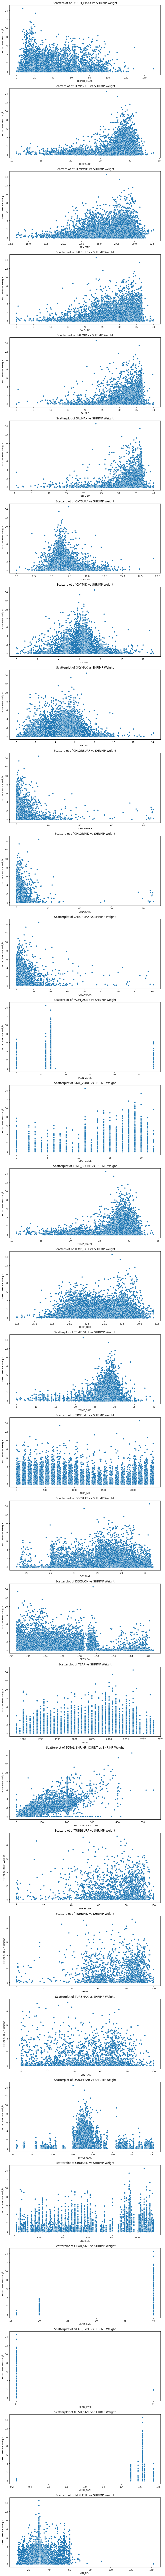

In [12]:
# Setting up the plotting area
num_columns = X_filtered.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))


# Iterate over each column in X to create scatterplots
for i, column in enumerate(X_filtered.columns):
    sns.scatterplot(x=X_filtered[column], y=y_filtered, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} vs SHRIMP Weight')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('TOTAL SHRIMP Weight')

plt.tight_layout()
plt.show()


In [13]:
X_filtered.columns

Index(['DEPTH_EMAX', 'TEMPSURF', 'TEMPMID', 'SALSURF', 'SALMID', 'SALMAX',
       'OXYSURF', 'OXYMID', 'OXYMAX', 'CHLORSURF', 'CHLORMID', 'CHLORMAX',
       'FAUN_ZONE', 'STAT_ZONE', 'TEMP_SSURF', 'TEMP_BOT', 'TEMP_SAIR',
       'TIME_MIL', 'DECSLAT', 'DECSLON', 'YEAR', 'TOTAL_SHRIMP_COUNT',
       'TURBSURF', 'TURBMID', 'TURBMAX', 'DAYOFYEAR', 'CRUISEID', 'GEAR_SIZE',
       'GEAR_TYPE', 'MESH_SIZE', 'MIN_FISH'],
      dtype='object')

In [14]:
#For selecting features, we will not want to use features that are very highly correlated. Therefore, we create a list of such features now

X_corr = X_filtered.drop(columns = 'GEAR_TYPE')

correlation_matrix = X_corr.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,DEPTH_EMAX,TEMPSURF,TEMPMID,SALSURF,SALMID,SALMAX,OXYSURF,OXYMID,OXYMAX,CHLORSURF,CHLORMID,CHLORMAX,FAUN_ZONE,STAT_ZONE,TEMP_SSURF,TEMP_BOT,TEMP_SAIR,TIME_MIL,DECSLAT,DECSLON,YEAR,TOTAL_SHRIMP_COUNT,TURBSURF,TURBMID,TURBMAX,DAYOFYEAR,CRUISEID,GEAR_SIZE,MESH_SIZE,MIN_FISH
DEPTH_EMAX,1.000000,0.172714,-0.352435,0.266759,0.494141,0.444891,-0.155514,0.062832,-0.046526,-0.127365,-0.113843,-0.133452,0.009656,-0.124406,0.175671,-0.638426,0.125461,0.009482,-0.270908,0.004928,0.143318,-0.039173,0.110824,0.138107,0.316876,-0.059421,0.163575,0.323903,0.200504,0.445855
TEMPSURF,0.172714,1.000000,0.705895,-0.026461,0.027428,0.022953,-0.383146,-0.320116,-0.251938,-0.096657,-0.046013,0.051381,-0.029173,0.052459,0.991874,0.336201,0.825320,-0.008192,-0.035983,-0.089665,0.220211,0.127630,-0.039931,0.057395,0.105318,-0.186938,0.232434,0.015601,0.062146,0.180840
TEMPMID,-0.352435,0.705895,1.000000,0.001129,-0.224078,-0.203742,-0.312445,-0.226173,-0.139252,-0.099679,-0.026846,0.112224,-0.020631,0.142752,0.697921,0.726838,0.591914,-0.053951,0.007028,-0.133223,0.174016,0.160910,0.003368,-0.003125,-0.137874,-0.011433,0.176880,-0.135330,-0.116647,-0.045338
SALSURF,0.266759,-0.026461,0.001129,1.000000,0.654006,0.540557,-0.385217,0.161168,0.268741,-0.385551,-0.081863,0.072846,-0.056409,0.073570,-0.031320,-0.120762,0.032405,-0.052157,-0.499532,-0.139645,0.180291,0.039984,0.365030,0.191711,0.150994,0.095749,0.188619,0.142419,0.181609,0.190652
SALMID,0.494141,0.027428,-0.224078,0.654006,1.000000,0.858804,-0.198134,-0.057832,0.106678,-0.180694,-0.182814,-0.077448,-0.059935,-0.106704,0.025587,-0.408058,0.041045,-0.039619,-0.395419,0.069574,0.151163,0.030310,0.207227,0.262632,0.299222,0.026928,0.160342,0.329991,0.322173,0.264494
SALMAX,0.444891,0.022953,-0.203742,0.540557,0.858804,1.000000,-0.157532,-0.090837,-0.111026,-0.183003,-0.153020,-0.124535,-0.045351,-0.101729,0.024413,-0.420472,0.015502,-0.036418,-0.324120,0.080253,0.165503,0.058481,0.176149,0.242015,0.322344,-0.010601,0.174639,0.441611,0.401372,0.301513
OXYSURF,-0.155514,-0.383146,-0.312445,-0.385217,-0.198134,-0.157532,1.000000,0.440811,0.169376,0.346711,0.121830,-0.026774,0.029874,-0.096284,-0.382863,-0.093999,-0.352708,0.078781,0.193657,0.136235,-0.179702,-0.079983,-0.234855,-0.118929,-0.047726,-0.034514,-0.182722,-0.017761,-0.071424,-0.160448
OXYMID,0.062832,-0.320116,-0.226173,0.161168,-0.057832,-0.090837,0.440811,1.000000,0.517434,-0.041312,0.057403,0.050876,0.016668,0.035465,-0.323113,-0.125782,-0.272604,0.035875,-0.104829,-0.061570,-0.117303,-0.082604,0.127586,0.003291,0.075423,0.043772,-0.122081,-0.028105,-0.016435,0.024118
OXYMAX,-0.046526,-0.251938,-0.139252,0.268741,0.106678,-0.111026,0.169376,0.517434,1.000000,-0.087222,-0.033198,-0.012502,-0.053493,0.014233,-0.254011,0.034208,-0.184042,-0.020474,-0.222027,-0.047323,-0.087191,-0.083293,0.163322,0.048512,0.132194,0.046681,-0.103903,-0.168893,-0.135014,-0.091216
CHLORSURF,-0.127365,-0.096657,-0.099679,-0.385551,-0.180694,-0.183003,0.346711,-0.041312,-0.087222,1.000000,0.726669,0.357157,0.015235,-0.067294,-0.098819,0.016660,-0.106658,0.031232,0.188916,0.097315,-0.082041,-0.002443,-0.414509,-0.317891,-0.177405,-0.027142,-0.078802,-0.043865,-0.087298,-0.120766


In [15]:
# Set the threshold for correlation
threshold = 0.75

# Find pairs of features with correlation above the threshold
high_correlation_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_correlation_pairs.append((feature1, feature2, correlation_matrix.iloc[i, j]))

# Convert the result to a DataFrame for better readability
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Display the pairs with high correlation
print(high_correlation_df)

    Feature 1   Feature 2  Correlation
0    TEMPSURF  TEMP_SSURF     0.991874
1    TEMPSURF   TEMP_SAIR     0.825320
2      SALMID      SALMAX     0.858804
3   STAT_ZONE     DECSLON    -0.873094
4  TEMP_SSURF   TEMP_SAIR     0.821541
5        YEAR    CRUISEID     0.971198
6    TURBSURF     TURBMID     0.820085


### Converting times to values that can be used in a model

In [16]:
# Function to convert float military time to string with zero padding
def float_to_military_time_str(time_float):
    # Convert float to int and then to string, padding with zeros if necessary
    time_str = f"{int(time_float):04d}"
    return time_str

# Function to convert military time string to minutes since midnight
def military_time_to_minutes(time_str):
    hours = int(time_str[:2])
    minutes = int(time_str[2:])
    return hours * 60 + minutes

# Convert float to military time string
df_filtered['MILITARY_TIME_STR'] = df_filtered['TIME_MIL'].apply(float_to_military_time_str)

# Apply the function to the MILITARY_TIME_STR column
df_filtered['MINUTES_SINCE_MIDNIGHT'] = df_filtered['MILITARY_TIME_STR'].apply(military_time_to_minutes)



### Observations

We notice that there are some patterns. First, GEAR_SIZE is roughly linearly related to the catch, so it might be reasonable to define a model that regresses for the total catch by gear size.

In [17]:
df_filtered['GEAR_SIZE'].value_counts()

GEAR_SIZE
40.0    8805
20.0    1340
16.0      89
Name: count, dtype: int64

In [18]:
df_filtered['MESH_SIZE'].value_counts()

MESH_SIZE
1.63    8625
1.50    1361
1.75      71
1.65      68
0.25      58
1.58      51
Name: count, dtype: int64

In [19]:
df_CONSTANTMESH = df_filtered[df_filtered['MESH_SIZE']==1.63]

In [20]:
df_CONSTANTMESH['GEAR_SIZE'].value_counts()

GEAR_SIZE
40.0    8615
16.0      10
Name: count, dtype: int64

In [21]:
#There are only 10 measurements with the smaller gear, so we can drop those

df_CONSTANTMESH = df_CONSTANTMESH[ df_CONSTANTMESH['GEAR_SIZE']==40.0]

## Creation of the filtered datasets

In [24]:
#Creating a dataframe from all this data

df_filtered.to_csv('../../data/SHRIMP_filtered_imputed_zeroes.csv', index=False)

In [25]:
#Creating a dataframe from only the data with constant gear

df_CONSTANTMESH.to_csv('../../data/SHRIMP_constant_gear.csv', index=False)

# Understanding TOTAL_SHRIMP_WEIGHT

In [26]:
# Distribution
distribution = df_filtered['TOTAL_SHRIMP_WEIGHT'].value_counts()

# Mean
mean_value = df_filtered['TOTAL_SHRIMP_WEIGHT'].mean()

#Variance

variance = df_filtered['TOTAL_SHRIMP_WEIGHT'].var()

# Quartiles
quartiles = df_filtered['TOTAL_SHRIMP_WEIGHT'].quantile([0.25, 0.5, 0.75])

# Summary statistics
summary = df_filtered['TOTAL_SHRIMP_WEIGHT'].describe()

# Print results
print("Distribution of TOTAL_SHRIMP_WEIGHT")
print(distribution)
print("\nMean of TOTAL_SHRIMP_WEIGHT:", mean_value)
print("\nVariance of TOTAL_SHRIMP_WEIGHT:", variance)
print("\nQuartiles of TOTAL_SHRIMP_WEIGHT:")
print(quartiles)
print("\nSummary statistics of TOTAL_SHRIMP_WEIGHT:")
print(summary)


Distribution of TOTAL_SHRIMP_WEIGHT
TOTAL_SHRIMP_WEIGHT
0.000    512
0.010    178
0.020    157
0.040    134
0.050    119
        ... 
3.254      1
8.798      1
0.720      1
2.964      1
6.495      1
Name: count, Length: 3457, dtype: int64

Mean of TOTAL_SHRIMP_WEIGHT: 1.1139282782916375

Variance of TOTAL_SHRIMP_WEIGHT: 2.2083169443295034

Quartiles of TOTAL_SHRIMP_WEIGHT:
0.25    0.10
0.50    0.48
0.75    1.60
Name: TOTAL_SHRIMP_WEIGHT, dtype: float64

Summary statistics of TOTAL_SHRIMP_WEIGHT:
count    10234.000000
mean         1.113928
std          1.486041
min          0.000000
25%          0.100000
50%          0.480000
75%          1.600000
max         14.491000
Name: TOTAL_SHRIMP_WEIGHT, dtype: float64


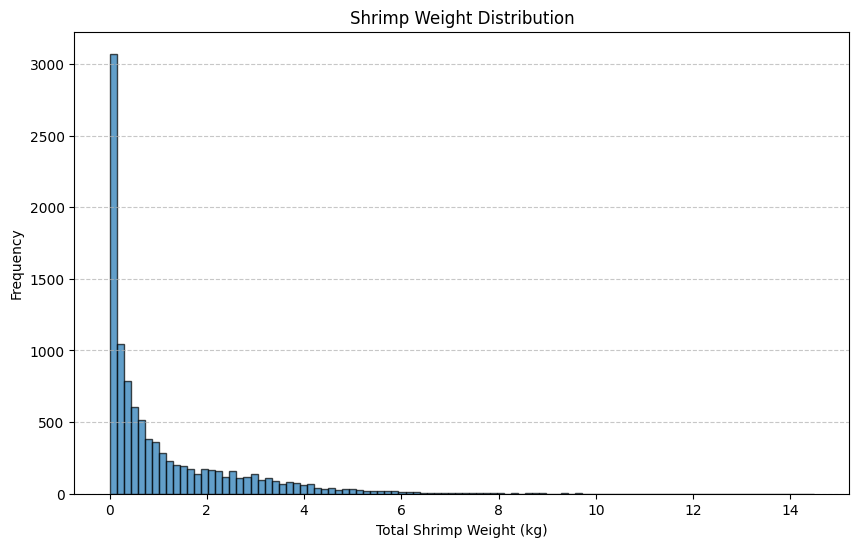

In [27]:
import matplotlib.pyplot as plt



# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['TOTAL_SHRIMP_WEIGHT'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Shrimp Weight Distribution')
plt.xlabel('Total Shrimp Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
df_filtered['CATCH_TRANSFORM'] = np.log(df_filtered['TOTAL_SHRIMP_WEIGHT'] +1) #Trying out a transformation to better understand the FIN_CATCH distribution

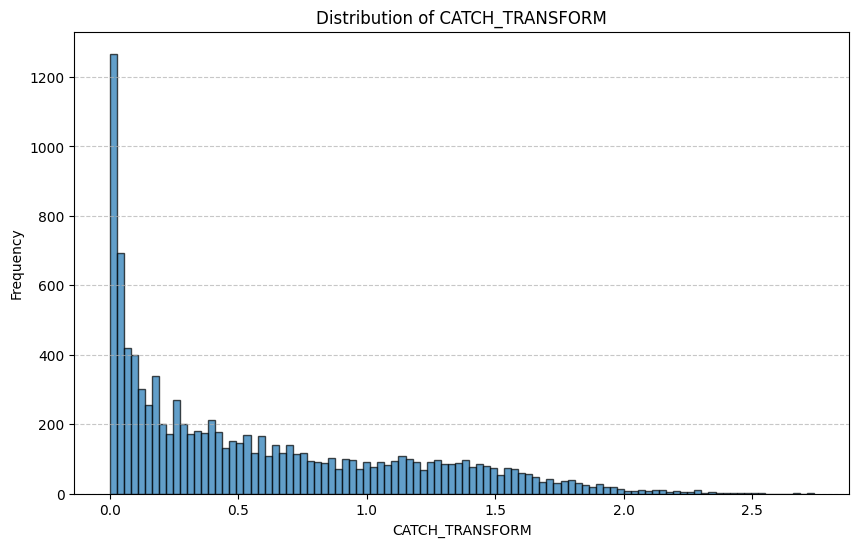

In [29]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CATCH_TRANSFORM'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of CATCH_TRANSFORM')
plt.xlabel('CATCH_TRANSFORM')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()